# Basics of Returns



### Formula for Simple Rate of Return

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternatively


$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$ 

In [48]:
# Import the necessary libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [49]:
# Let's create a dataframe for 5 different stock prices for Stock A and Stock B:

prices = pd.DataFrame({"STOCK A": [10,10.5,12,13,11.6], "STOCK B": [22,24.6,23,25.3,24.8]})
prices

,STOCK A,STOCK B
0,10.0,22.0
1,10.5,24.6
2,12.0,23.0
3,13.0,25.3
4,11.6,24.8


In [50]:
# If we want all the prices except the first one:

prices.iloc[1:]

,STOCK A,STOCK B
1,10.5,24.6
2,12.0,23.0
3,13.0,25.3
4,11.6,24.8


In [51]:
# If we want all the prices except the last one:

prices.iloc[:-1]

,STOCK A,STOCK B
0,10.0,22.0
1,10.5,24.6
2,12.0,23.0
3,13.0,25.3


In [52]:
# "values()" is an inbuilt method that takes a DataFrame and pulls the values out and gives us back the NumPy array. 
# It's actually a NumPy matrix but it's just pure NumPy without the index. 
# It doesn't have anything to align by and so it'll do just pure positional division.

prices.iloc[1:].values/prices.iloc[:-1]

,STOCK A,STOCK B
0,1.050000,1.118182
1,1.142857,0.934959
2,1.083333,1.100000
3,0.892308,0.980237


In [53]:
# Let's divide "prices.iloc[1:]" by "prices.iloc[:-1] by just shifting the rows down. 
# There is actually a method in DataFrame that allows us to shift it right away: shift(1)

prices/prices.shift(1)

,STOCK A,STOCK B
0,NaN,NaN
1,1.050000,1.118182
2,1.142857,0.934959
3,1.083333,1.100000
4,0.892308,0.980237


In [54]:
# DataFrame has a method called pct_change() that calculates the percentage change between the current and a prior element.
# So if we look at prices.pct_change, we'll get exactly the same numbers.

prices.pct_change()

,STOCK A,STOCK B
0,NaN,NaN
1,0.050000,0.118182
2,0.142857,-0.065041
3,0.083333,0.100000
4,-0.107692,-0.019763


In [55]:
# Now, let's pull the sample prices for "Stock C" and "Stock D" I created from "sample_prices" file:

prices = pd.read_csv('sample_prices.csv')
prices

,STOCK C,STOCK D
0,8.70,10.66
1,8.90,11.08
2,8.71,10.71
3,8.43,11.59
4,8.72,12.10
5,9.05,11.79
6,8.95,11.21
7,9.24,12.52
8,9.12,13.36
9,9.40,14.41


In [56]:
# Let's calculate the returns. The fastest way to calculate them is:

returns = prices.pct_change()
returns

,STOCK C,STOCK D
0,NaN,NaN
1,0.022989,0.039400
2,-0.021348,-0.033394
3,-0.032147,0.082166
4,0.034401,0.044003
5,0.037844,-0.025620
6,-0.011050,-0.049194
7,0.032402,0.116860
8,-0.012987,0.067093
9,0.030702,0.078593


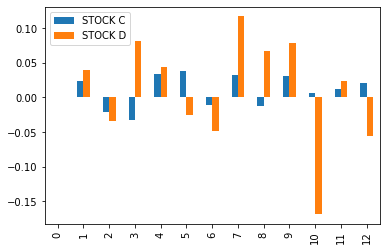

In [57]:
# Let's plot the "returns" dataframe:

returns.plot.bar()

In [58]:
# Apparently, Stock C is less volatile than Stock D. So, to see that let's calculate the standard deviation of these returns:

returns.std()

STOCK C    0.023998
STOCK D    0.079578
dtype: float64

In [59]:
# Now, let's calculate the average return for each stock:

returns.mean()

STOCK C    0.009976
STOCK D    0.010005
dtype: float64

In [60]:
# The returns for both stocks are almost the same. 

In [61]:
# Now, let's add 1 to all elements to "returns" dataframe:

returns + 1

,STOCK C,STOCK D
0,NaN,NaN
1,1.022989,1.039400
2,0.978652,0.966606
3,0.967853,1.082166
4,1.034401,1.044003
5,1.037844,0.974380
6,0.988950,0.950806
7,1.032402,1.116860
8,0.987013,1.067093
9,1.030702,1.078593


In [62]:
# Now, I can call prod function on "returns + 1". That will take returns, add 1 to it, and then it'll multiply each column and give us the result of multiplying each column

np.prod(returns+1) - 1


STOCK C    0.122989
STOCK D    0.087242
dtype: float64

In [63]:
# Stock C gives us compounded return of 12.29% and Stock D gives us compunded rate of 8.72%. 
# It is interesting because the mean for both stocks were almost the same. 
# Or we can use prod() method to obtain the same result:

(returns+1).prod() - 1

STOCK C    0.122989
STOCK D    0.087242
dtype: float64

In [98]:
#We can make it look more intelligible:

(((returns+1).prod() - 1) * 100).round(2)

STOCK C    12.30
STOCK D     8.72
dtype: float64

## Annualization

In [66]:
# Let's say we have an daily return of 0.1%. How do we annualize it? 
# We just raise it to the power of 252 and subtruct 1 from the total. (Approximately 252 trading days in a given year)

daily_return = 0.001
(1 + daily_return) ** 252 - 1

0.28643404437615216

In [67]:
# Let's say we have an monthly return of 1%. How do we annualize it? 
# We just raise it to the 12th power and subtruct 1 from the total. (12 months in a given year)

monthly_return = 0.01
(1 + monthly_return) ** 12 - 1

0.12682503013196977

In [68]:
# Now, let's say we have an quarterly return of 4%. How do we annualize it? 
# We just raise it to the 3rd power and subtruct 1 from the total. (4 quarters in a given year)

quarterly_return = 0.04
(1 + quarterly_return) ** 4

1.1698585600000002